# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\91951\\OneDrive\\Desktop\\ALL DEEP LEARNING PROJECTS FOR RESUME\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df.head() # how much spent on advertising on TV ,Radio etc... Resulting Sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df["Total_spent"]=df["TV"]+df["radio"]+df["newspaper"] # all features are combined to a single feature

In [5]:
df.head()

,TV,radio,newspaper,sales,Total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


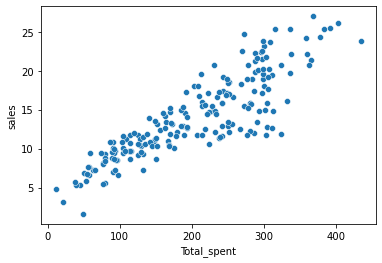

In [6]:
sns.scatterplot(data=df,x="Total_spent",y="sales") # to see relationship between the sales and the Total_spent in advertisement

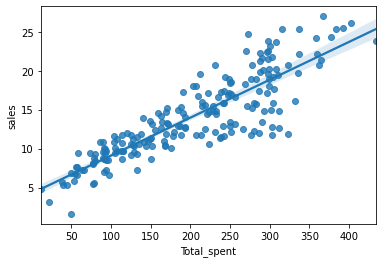

In [7]:
sns.regplot(data=df,x="Total_spent",y="sales") # best fit for single feature with ordinary least square method

In [8]:
X=df["Total_spent"]
Y=df["sales"]

In [9]:
para=np.polyfit(X,Y,deg=1)

In [10]:
para[0] # theta 1

0.048687879319048145

In [11]:
para[1] # theta 0

4.2430282160363255

In [12]:
potential_spent=np.linspace(0,500,100)

In [13]:
predicted_sales=para[0]*potential_spent+para[1]

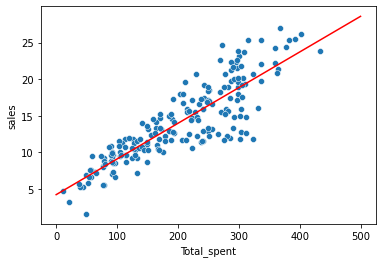

In [14]:
plt.plot(potential_spent,predicted_sales,color="red")
sns.scatterplot(x='Total_spent',y="sales",data=df)

In [15]:
spend=200

In [16]:
predicted_sales=para[0]*spend+para[1]

In [17]:
predicted_sales

13.980604079845955

In [18]:
param=np.polyfit(X,Y,deg=3)

In [19]:
param[0]

3.0761503304797577e-07

In [20]:
param[1]

-0.00018939244934762463

In [21]:
param[2]

0.0820886302306754

In [22]:
param[3]

2.7049505259500313

In [23]:
spent1=np.linspace(0,500,100)

In [24]:
pred=param[0]*spent1**3+param[1]*spent1**2+param[2]*spent1+param[3]

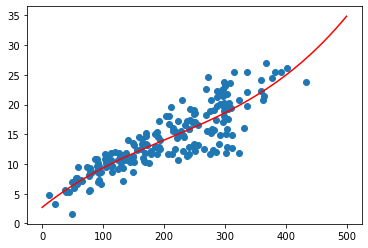

In [25]:
plt.scatter(x='Total_spent',y="sales",data=df)
plt.plot(spent1,pred,color='red')

# Linear Regression with SciKit-Learn (SKLEARN)

In [30]:
df2=df.drop("Total_spent",axis=1)

In [31]:
df2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'newspaper vs Sales')

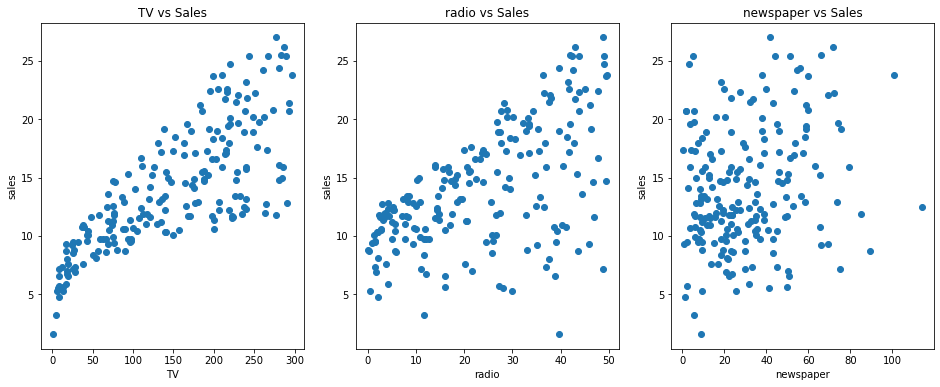

In [36]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df2["TV"],df2["sales"],"o")
axes[0].set_xlabel("TV")
axes[0].set_ylabel("sales")
axes[0].set_title("TV vs Sales")
axes[1].plot(df2["radio"],df2["sales"],"o")
axes[1].set_xlabel("radio")
axes[1].set_ylabel("sales")
axes[1].set_title("radio vs Sales")
axes[2].plot(df2["newspaper"],df2["sales"],"o")
axes[2].set_xlabel("newspaper")
axes[2].set_ylabel("sales")
axes[2].set_title("newspaper vs Sales")


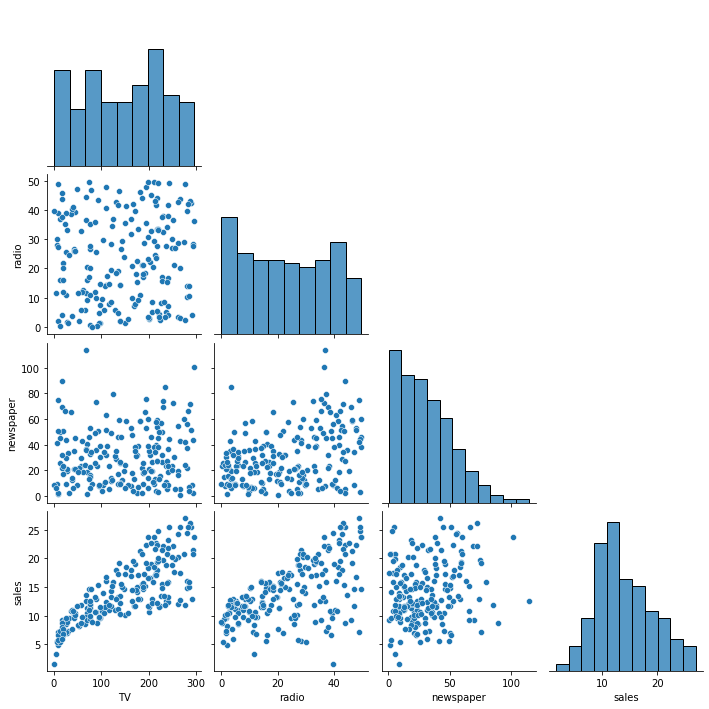

In [38]:
sns.pairplot(df2,corner=True)

In [39]:
X=df2.drop('sales',axis=1)

In [40]:
Y=df2['sales']

In [41]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [42]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split


In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=101)

In [47]:
x_train.head()

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8


In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 154 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         134 non-null    float64
 1   radio      134 non-null    float64
 2   newspaper  134 non-null    float64
dtypes: float64(3)
memory usage: 4.2 KB


In [50]:
x_train

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [52]:
y_train

154    15.6
114    14.6
118    15.9
64     18.0
165    11.9
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 134, dtype: float64

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
my_model=LinearRegression()

In [55]:
my_model.fit(x_train,y_train)

LinearRegression()

In [57]:
predictions=my_model.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
df2['sales'].mean()

14.022500000000003

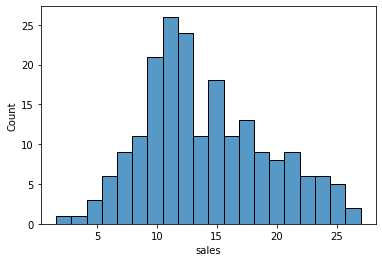

In [62]:
sns.histplot(data=df2,x='sales',bins=20)

In [63]:
mean_absolute_error(y_test,predictions) # dont consider the far away points effects

1.2369188494259309

In [66]:
MSE=mean_squared_error(y_test,predictions) # considers far away points and returns in squared units .so to get normal units simply do square root which same as RMSE

In [67]:
RMSE=np.sqrt(MSE)

In [68]:
RMSE

1.5324409426512415